In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv('C:\\Users\\monst\\Desktop\\github projects\\Data sets\\game_companies_historical.csv')

In [3]:
data

,Date,Open,High,Low,Close,Volume
0,1/4/2010,11.23,11.45,11.15,11.30,9310055
1,1/5/2010,11.24,11.36,11.21,11.32,11370203
2,1/6/2010,11.26,11.38,11.21,11.26,6541811
3,1/7/2010,11.10,11.19,10.93,10.99,15392067
4,1/8/2010,10.97,11.05,10.88,10.90,11003838
...,...,...,...,...,...,...
3091,4/12/2022,79.59,79.82,79.41,79.54,4719189
3092,4/13/2022,79.33,79.38,78.79,79.10,5941888
3093,4/14/2022,78.96,79.17,78.85,78.93,4571582
3094,4/18/2022,78.80,79.12,78.72,79.06,6146823


In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/4/2010,11.23,11.45,11.15,11.30,9310055
1,1/5/2010,11.24,11.36,11.21,11.32,11370203
2,1/6/2010,11.26,11.38,11.21,11.26,6541811
3,1/7/2010,11.10,11.19,10.93,10.99,15392067
4,1/8/2010,10.97,11.05,10.88,10.90,11003838


In [5]:
data.tail()

,Date,Open,High,Low,Close,Volume
3091,4/12/2022,79.59,79.82,79.41,79.54,4719189
3092,4/13/2022,79.33,79.38,78.79,79.10,5941888
3093,4/14/2022,78.96,79.17,78.85,78.93,4571582
3094,4/18/2022,78.80,79.12,78.72,79.06,6146823
3095,4/19/2022,78.96,79.34,78.82,78.95,1649187


In [6]:
data.shape

(3096, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3096 non-null   object 
 1   Open    3096 non-null   float64
 2   High    3096 non-null   float64
 3   Low     3096 non-null   float64
 4   Close   3096 non-null   float64
 5   Volume  3096 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 145.2+ KB


In [11]:
data.describe()

,Open,High,Low,Close,Volume
count,3096.000000,3096.000000,3096.000000,3096.000000,3.096000e+03
mean,40.045107,40.515178,39.521415,40.032300,8.436004e+06
std,26.772085,27.063154,26.419020,26.741549,6.039270e+06
min,9.970000,10.160000,9.930000,10.010000,1.369310e+06
25%,13.407500,13.575000,13.277500,13.482500,5.280816e+06
50%,35.225000,35.555000,34.770000,35.200000,7.043400e+06
75%,62.660000,63.462500,61.992500,62.760000,9.745272e+06
max,103.820000,104.490000,102.580000,103.810000,1.330824e+08


In [12]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [15]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

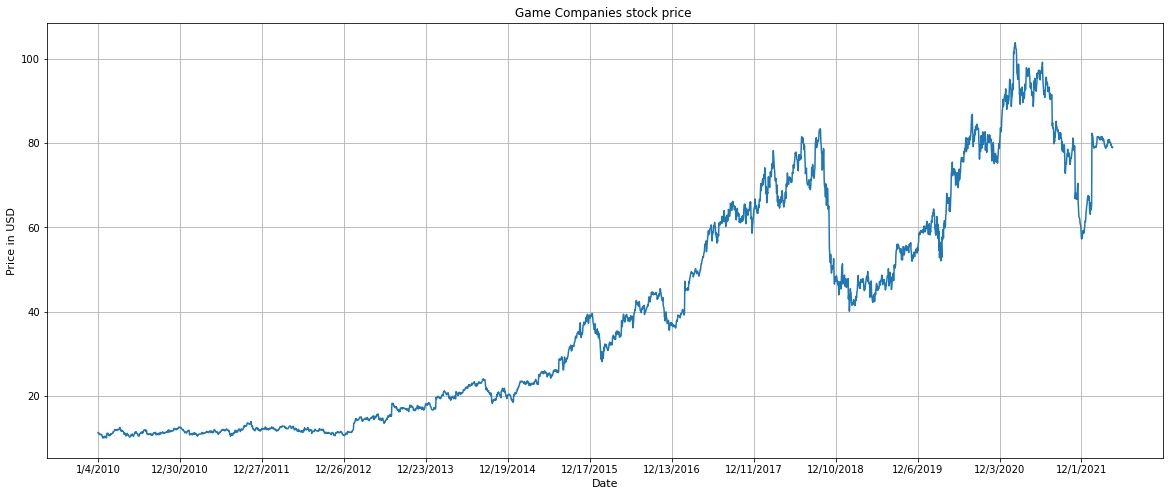

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['Close'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Game Companies stock price ')
plt.grid()
plt.show()


In [19]:
data['Market Cap'] = data['Open']*data['Volume']

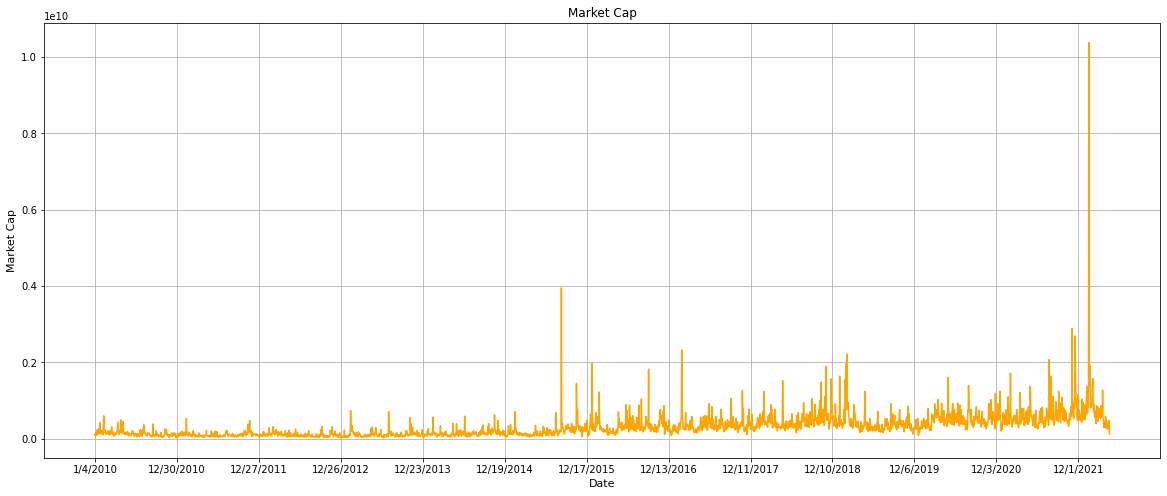

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

In [21]:
data.iloc[data['Market Cap'].argmax()]

Date               1/18/2022
Open                   86.76
High                    86.9
Low                    81.45
Close                  82.31
Volume             119530224
Market Cap    10370442234.24
Name: 3032, dtype: object

In [22]:
data['vol'] = (data['Close']/data['Close'].shift(1)) - 1

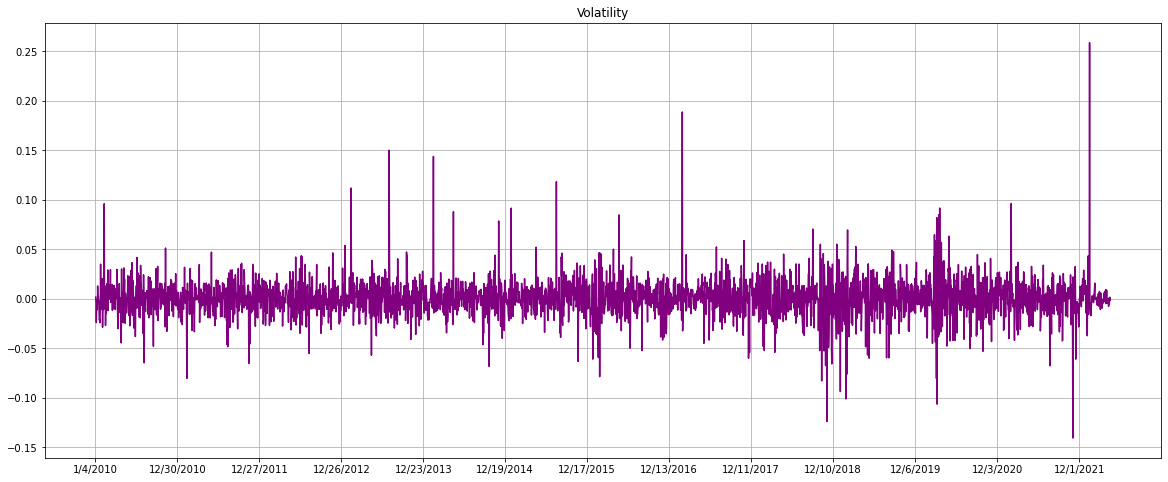

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()

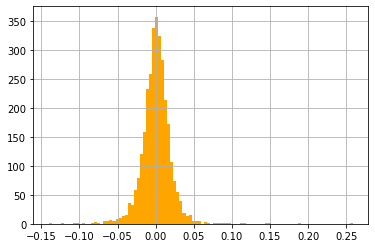

In [26]:
data['vol'].hist(bins=100, color='orange');

In [27]:
data['Cumulative Return'] = (1 + data['vol']).cumprod()

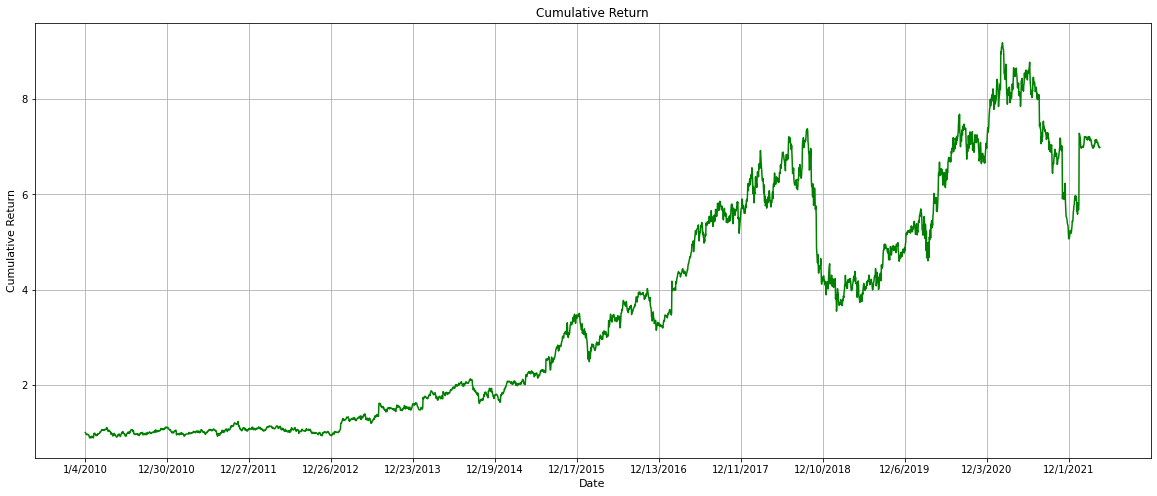

In [28]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [29]:
data.iloc[data['Cumulative Return'].argmax()]


Date                    2/12/2021
Open                       102.78
High                       103.89
Low                        102.14
Close                      103.81
Volume                    3023802
Market Cap           310786369.56
vol                      0.005521
Cumulative Return        9.186726
Name: 2798, dtype: object